In [ ]:
# Install fastai
!pip install fastai -q
!pip install fastai --upgrade

In [35]:
from fastai.tabular.all import *
import pandas as pd
import csv

In [36]:
# Load the csv as a dataframe
path = Path(".")
df1 = pd.read_csv(path/'train2.csv')
# Remove the id column from R's dataframe
del df1['Unnamed: 0']

In [37]:
# Check the first categorical variable before duration
list(df1.columns)[6]

'confirmed'

In [38]:
# Check duration
list(df1.columns)[7]

'duration'

In [43]:
# Get a list of categorical columns
df1_cat = list(df1.columns)

df1_cat = df1_cat[0:7] + df1_cat[9: ]
# Only age and duration are numerical, the others are categorical

In [44]:
# Get a list of numerical columns, not counting the thing we're predicting
df1_num = list(df1.columns)[8:9]
# The only numerical columns are the age and duration
# We don't include duration because we are predicting it
list(df1.columns)[8]
# This column should be about age

'clean_age'

In [41]:
# I determined the y_range by using
# ```max(merged_df1$duration)```
# in R and adding one to the maximum. I remember it being recommended
# by the fast.ai prof, I think because the neuron is asymptotic to
# the maximum value, I'm not entirely sure.

In [45]:
# Training and validation splits
splits = RandomSplitter(valid_pct=0.2)(range_of(df1))

In [184]:
# This is some a data cleaning step
to = TabularPandas(df1, procs = [Categorify, FillMissing, Normalize],
                   cat_names = df1_cat, cont_names = df1_num,
                   y_names = 'duration',
                   splits = splits)
# This determines batch size
dls = to.dataloaders(bs = 4)

In [254]:
# y_range is used so that the model knows it's doing regression
# I chose 33 because the max of the training duration is 32
# We are using 2 hidden layers, 50 neurons in the first, 25 in the second
learn = tabular_learner(dls, y_range = (0, 33), metrics = rmse,
                        layers = [50, 25])

In [256]:
learn.fit_one_cycle(15, lr_max = 0.30, wd=0.8)

epoch,train_loss,valid_loss,_rmse,time
0,47.034763,15.360549,3.919254,00:01
1,58.787998,21.372093,4.622996,00:01
2,68.195641,21.269445,4.611881,00:01
3,49.638493,21.372093,4.622996,00:01
4,176.666290,13.311755,3.648528,00:00
5,88.049980,18.901302,4.347563,00:00
6,49.952652,13.484227,3.672088,00:00
7,33.920357,11.538023,3.396767,00:00
8,28.107014,11.431960,3.381118,00:00
9,25.892780,14.124069,3.758200,00:01


SuggestedLRs(lr_min=0.33113112449646, lr_steep=1.9054607491852948e-06)

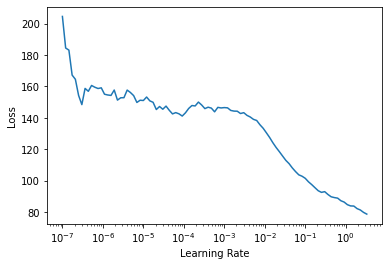

In [255]:
# Use this to figure out what learning rate to use
learn.recorder.lr_find()

In [257]:
# Load the test set
df2 = pd.read_csv(path/'test2.csv')

In [258]:
# Look at the first column
list(df2.columns)[0]

'Unnamed: 0'

In [259]:
# Remove the id column from R's dataframe
del df2['Unnamed: 0']

In [260]:
# Create the test set data frame
dl = learn.dls.test_dl(df2)

In [261]:
# Get the predictions from the model on the test set
p1 = learn.get_preds(dl = dl)

In [262]:
# Get the list of predictions
p2 = p1[0].tolist()

In [264]:
# Print the predictions to a csv file
with open('testing.csv', mode='w') as employee_file:
  employee_writer = csv.writer(employee_file, delimiter = ',',
                               quotechar = '"', quoting = csv.QUOTE_MINIMAL)
  employee_writer.writerow(p2)
print("Done")

Done
